In [57]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
sns.set_context('poster') #Adjust the resolution of the graphs

In [58]:
titanic_df=pd.read_csv('train.csv')

In [59]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
titanic_df.info() # First Step

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Questions Answered:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their
class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

5.) What factors helped someone survive the sinking?

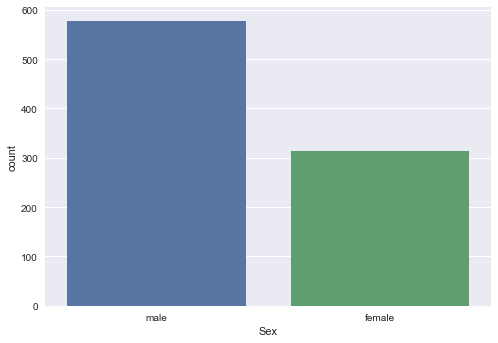

In [61]:
# For Categorical Variables
sns.categorical.countplot(titanic_df.Sex)

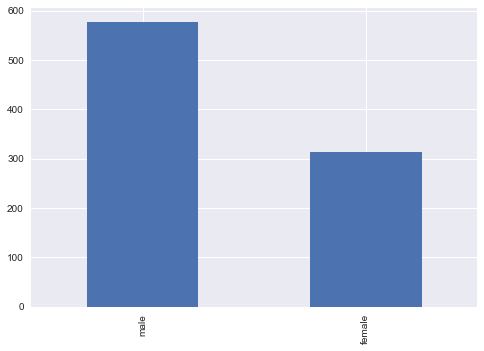

In [62]:
titanic_df.Sex.value_counts().plot(kind='bar') # Similar to the code above

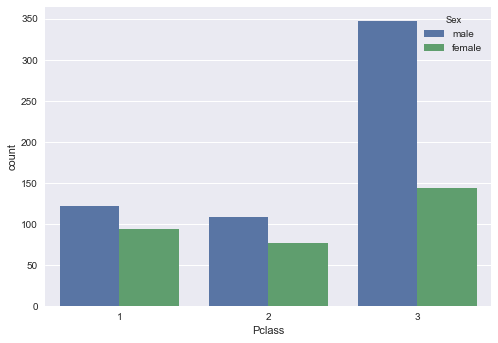

In [63]:
# To see the interactions between Categorical Variables
# Now let's seperate the genders by classes, remember to use the 'hue' arguement here!
sns.countplot('Pclass',data=titanic_df,hue='Sex')

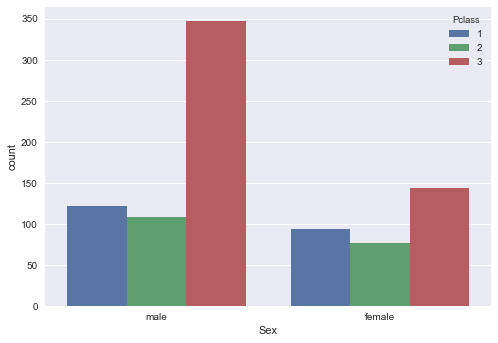

In [64]:
sns.countplot('Sex',data=titanic_df,hue='Pclass')

In [65]:
for i in titanic_df.index:
    if titanic_df.loc[i,'Age']<16:
        titanic_df.loc[i,'Person']='child'
    else:
        titanic_df.loc[i,'Person']=titanic_df.loc[i,'Sex']

In [66]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


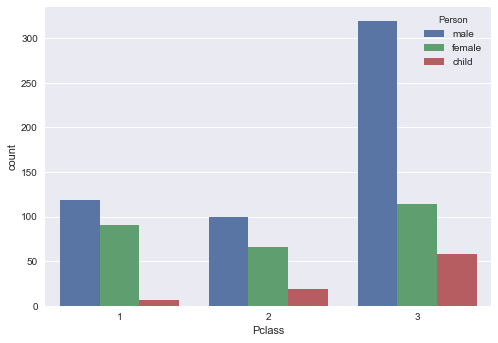

In [67]:
sns.countplot('Pclass',data=titanic_df,hue='Person')

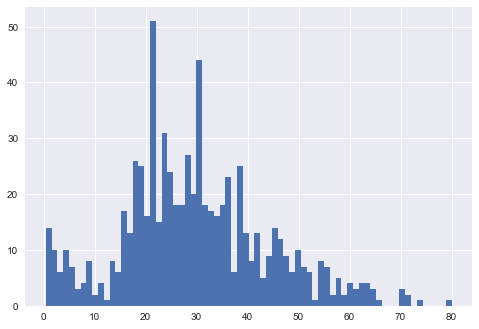

In [68]:
titanic_df.Age.hist(bins=70)

In [69]:
titanic_df.Age.mean()

29.69911764705882

In [70]:
titanic_df.Person.value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

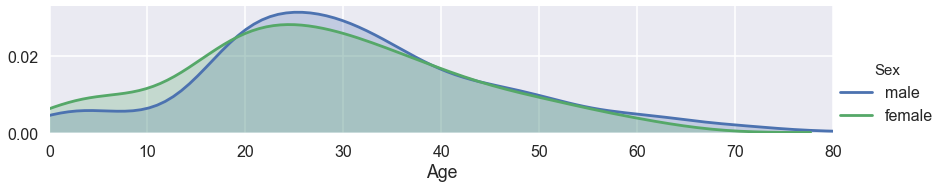

In [74]:
# For Numerical Variables
fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=4) # Create Dividsion By Age
fig.map(sns.kdeplot,'Age',shade=True) # Plot the PDF for ages
oldest=titanic_df['Age'].max() # Set the axis
fig.set(xlim=(0,oldest))
fig.add_legend()

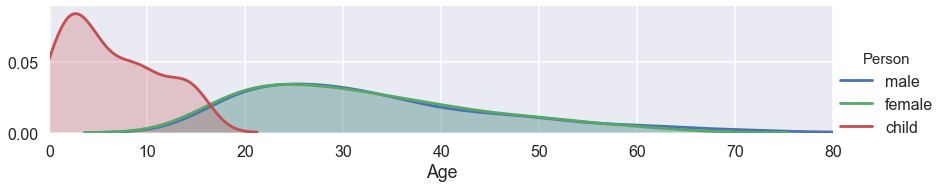

In [75]:
fig=sns.FacetGrid(titanic_df,hue='Person',aspect=4) # Create Dividsion By Age
fig.map(sns.kdeplot,'Age',shade=True) # Plot the PDF for ages
oldest=titanic_df['Age'].max() # Set the axis
fig.set(xlim=(0,oldest))
fig.set(ylim=(0,0.09))
fig.add_legend()

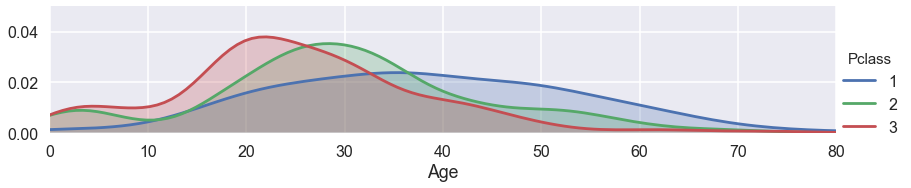

In [76]:
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4) # Create Dividsion By Age
fig.map(sns.kdeplot,'Age',shade=True) # Plot the PDF for ages
oldest=titanic_df['Age'].max() # Set the axis
fig.set(xlim=(0,oldest))
fig.set(ylim=(0,0.05))
fig.add_legend()

In [77]:
# Deal with Categorical Variable with Nan

In [78]:
deck=titanic_df['Cabin'].dropna()

In [79]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [80]:
levels=[level[0] for level in deck]  # Extract the major Cabin class

In [81]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

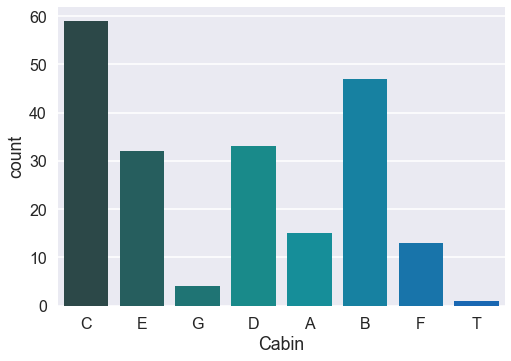

In [82]:
sns.countplot(cabin_df.Cabin,palette='winter_d')

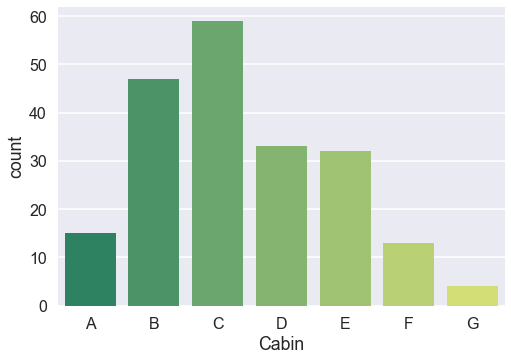

In [83]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.countplot('Cabin',data=cabin_df,palette='summer',order=['A','B','C','D','E','F','G'])

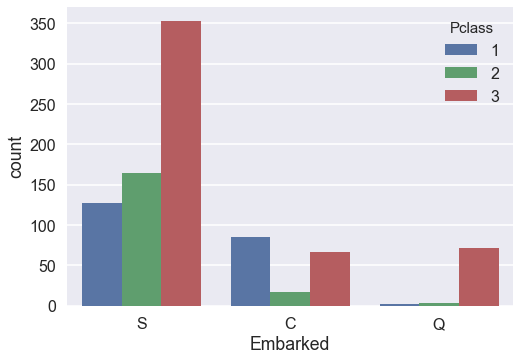

In [84]:
sns.countplot('Embarked',data=titanic_df,hue='Pclass')

In [85]:
titanic_df['Alone']=titanic_df.SibSp+titanic_df.Parch

In [87]:
titanic_df['Alone'].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: Alone, dtype: int64

In [88]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Faimily'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'

/Users/zijianwang/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [90]:
titanic_df['Alone'].head()

0    With Faimily
1    With Faimily
2           Alone
3    With Faimily
4           Alone
Name: Alone, dtype: object

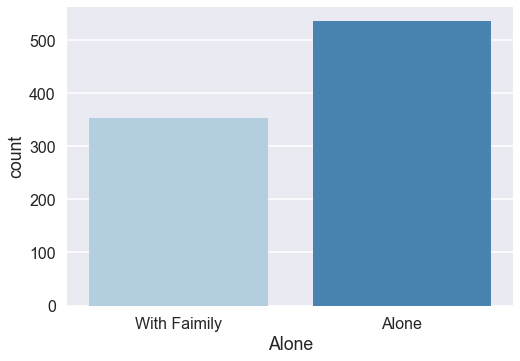

In [91]:
sns.countplot('Alone',data=titanic_df,palette='Blues')

In [92]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})

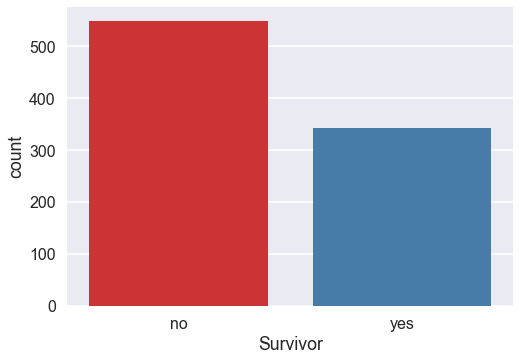

In [95]:
sns.countplot('Survivor',data=titanic_df,palette='Set1')

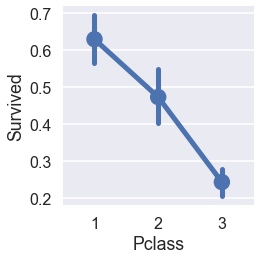

In [97]:
sns.factorplot('Pclass','Survived',data=titanic_df)
## Lower class has much lower chance to survive
## sns.factorplot(x,y) ----- EDA method for (0,1) factor variable

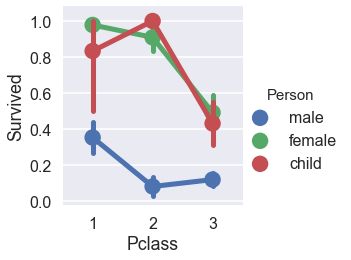

In [99]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='Person')

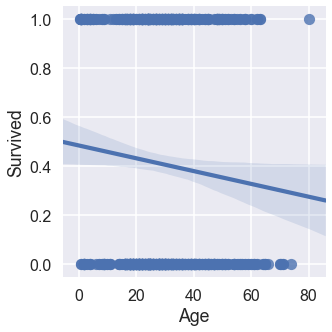

In [100]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)

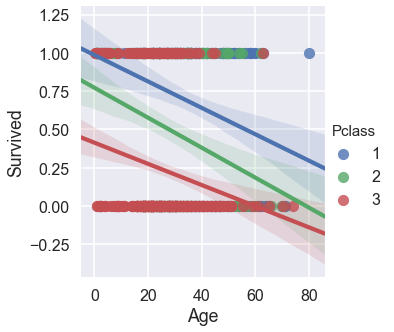

In [101]:
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass')
# The plot is not very nice
# Use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

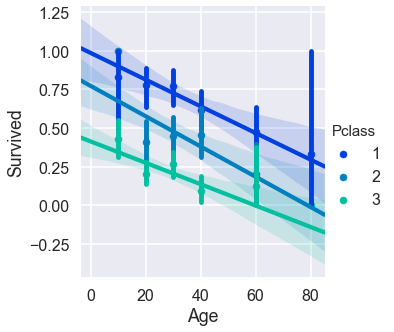

In [102]:
generations=[10,20,30,40,60,80]

sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass',palette='winter',x_bins=generations)

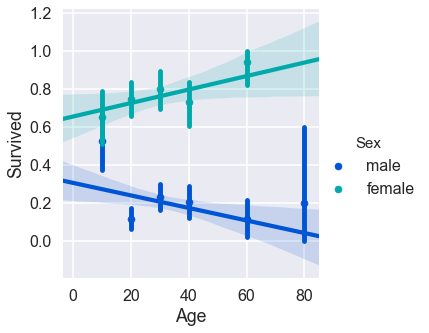

In [103]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)
# insights: women, the elder, the easier to survive